In [211]:
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr
import os


In [212]:
def get_pandas_frame(path):
    return pyreadr.read_r(path)[None]

def get_pandas_r_file(week_nr, file_type):
    week_nr = str(week_nr)
    week_folder = f"Kickstarter rds files/2019_week{week_nr}"
    pledge_name =os.path.join(week_folder, f"{file_type}.rds")
    return get_pandas_frame(pledge_name)


In [213]:
posts_week_19 = get_pandas_r_file(19, "posts")
posts_week_19


,Project_my_id,creator_slug,project_slug,Post_Nb,Post_Title,Post_Date,Post_Text,Post_id
0,project_000001,2146868994,the-because-black-life-conference-2018,Update #1,Can you believe it!! 8 Endorsements!!!,"May 18, 2018",The Because Black Life Conference is a (Black)...,project_0000011
1,project_000002,1805256969,petography-illustrations-of-your-pet,Update #5,Petography End of July Update!,"Jul 24, 2018",Hi everyone! Hope your summer is going well! ...,project_0000025
2,project_000002,1805256969,petography-illustrations-of-your-pet,Update #4,Digital Update!,"Jul 11, 2018",ONLY FOR BACKERS,project_0000024
3,project_000002,1805256969,petography-illustrations-of-your-pet,Update #3,Petography Update!,"Jun 13, 2018",ONLY FOR BACKERS,project_0000023
4,project_000002,1805256969,petography-illustrations-of-your-pet,Update #2,Name of your pets!,"May 22, 2018",ONLY FOR BACKERS,project_0000022
...,...,...,...,...,...,...,...,...
446868,project_073361,rowanlakejr,new-altervice,Update #4,A Bit of Info,"Mar 14, 2019",Just in case you never saw what the larger siz...,project_0733614
446869,project_073361,rowanlakejr,new-altervice,Update #3,Altervice Website Part 2,"Mar 11, 2019",The Altervice website is almost complete. I've...,project_0733613
446870,project_073361,rowanlakejr,new-altervice,Update #2,Altervice Website,"Mar 5, 2019",That's right folks! I'm currently working on a...,project_0733612
446871,project_073361,rowanlakejr,new-altervice,Update #1,New Altervice Commercial,"Mar 1, 2019",Hey guys! Thanks so much for support! Here's a...,project_0733611


In [214]:
posts_week_19["Post_Text"]


0         The Because Black Life Conference is a (Black)...
1         Hi everyone!  Hope your summer is going well! ...
2                                          ONLY FOR BACKERS
3                                          ONLY FOR BACKERS
4                                          ONLY FOR BACKERS
                                ...                        
446868    Just in case you never saw what the larger siz...
446869    The Altervice website is almost complete. I've...
446870    That's right folks! I'm currently working on a...
446871    Hey guys! Thanks so much for support! Here's a...
446872    With being a organic friendly company, with th...
Name: Post_Text, Length: 446873, dtype: object

# Sentiment analysis of financial new to train the model on specific news posts

In [215]:
file_name = "Sentiment financial news training set/all-data.csv"
sentiment_financial_data_set = pd.read_csv(file_name, names = ['labels','messages'],encoding='ISO-8859-1')

In [216]:
sentiment_financial_data_set

,labels,messages
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [217]:
type(sentiment_financial_data_set)

pandas.core.frame.DataFrame

/var/folders/f3/ykt1vfz96xz48try_trwdn440000gn/T/ipykernel_2067/4255258662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sentiment_financial_data_set.labels, palette= 'gray')


<Axes: xlabel='labels', ylabel='count'>

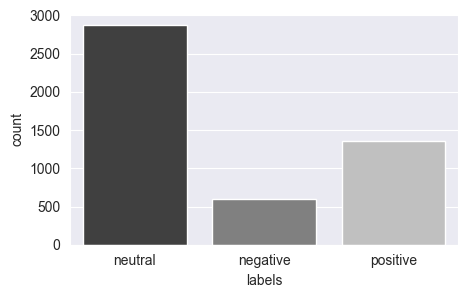

In [218]:
plt.figure(figsize=(5, 3))
sns.countplot(x=sentiment_financial_data_set.labels, palette= 'gray')

In [219]:
print(sentiment_financial_data_set.shape)
sentiment_financial_data_set.labels = sentiment_financial_data_set.labels.map( {'positive':0 , 'negative':1, 'neutral':2} )
sentiment_financial_data_set.labels.unique()

(4846, 2)


array([2, 1, 0])

In [220]:
sentiment_financial_data_set.labels.value_counts()


labels
2    2879
0    1363
1     604
Name: count, dtype: int64

In [221]:
sentiment_financial_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   labels    4846 non-null   int64 
 1   messages  4846 non-null   object
dtypes: int64(1), object(1)
memory usage: 75.8+ KB


In [222]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [223]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [224]:
sentiment_financial_data_set.columns = ['label', 'text']
sentiment_financial_data_set = sentiment_financial_data_set.dropna(subset=['text', 'label']) ## drop missing values
sentiment_financial_data_set.head()

,label,text
0,2,"According to Gran , the company has no plans t..."
1,2,Technopolis plans to develop in stages an area...
2,1,The international electronic industry company ...
3,0,With the new production plant the company woul...
4,0,According to the company 's updated strategy f...


In [225]:
sentences = sentiment_financial_data_set.text.values
labels = sentiment_financial_data_set.label.values

In [226]:
max_len = 0
for s in sentences:
    input_ids = tokenizer.encode(s, add_special_tokens=True)
    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('max length: ', max_len)

max length:  150


In [227]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

for sent in sentences:
    encoded_dict = tokenizer.encode_plus(sent,
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt', # Return pytorch tensors.
                   )

    input_ids.append(encoded_dict['input_ids']) # Add the encoded sentence to the list.

    attention_masks.append(encoded_dict['attention_mask'])#  attention mask


input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/Users/mehdigreefhorst/Desktop/Strategy and business models/venv/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [228]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)
train_size = int(0.9 * len(dataset))# .1 test split
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
print(train_size,val_size )

4361 485


In [229]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

#For fine-tuning BERT on a specific task, the paper authors recommend a batch size of 16 or 32.
batch_size = 32
train_dataloader = DataLoader(train_dataset, sampler = RandomSampler(train_dataset), batch_size = batch_size)
validation_dataloader = DataLoader( val_dataset, sampler = SequentialSampler(val_dataset), batch_size = batch_size
        )

In [231]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 3,
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# run on the GPU.
if torch.cuda.is_available():
    model.cuda()
else:
    model.to("cpu")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [232]:
torch.cuda.is_available()

False

In [233]:
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))
print('Embedding Layer \n')
for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))
print('\nFirst Transformer\n')
for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))
print('\nOutput Layer\n')
for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))


The BERT model has 201 different named parameters.

Embedding Layer 

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

First Transformer

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (768,)
bert.encoder.

In [234]:
# AdamW is a class from the huggingface library (as opposed to pytorch)
optimizer = AdamW(model.parameters(),lr = 2e-5, eps = 1e-8)

/Users/mehdigreefhorst/Desktop/Strategy and business models/venv/lib/python3.11/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [235]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4.
epochs = 2
# Total number of training steps is [number of batches] x [number of epochs].
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [236]:
import numpy as np

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [237]:
import time
import datetime

def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))

    return str(datetime.timedelta(seconds=elapsed_rounded))

Train:

based on the run_glue.py script here:
https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


In [238]:
import random
import numpy as np

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):

    #  Training

    print("")
    print('Epoch {:} / {:} '.format(epoch_i + 1, epochs))
    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:

            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because
        # accumulating the gradients is "convenient while training RNNs".
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here:
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids,
                             token_type_ids=None,
                             attention_mask=b_input_mask,
                             labels=b_labels)


        loss = outputs.loss
        logits = outputs.logits
        # Accumulate the training loss over all of the batches
        total_train_loss += loss.item()
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # Update parameters and take a step using the computed gradient.
        optimizer.step()
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh : {:}".format(training_time))


    # Validation

    print("")
    print("Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently  during evaluation.
    model.eval()

    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():

            # The documentation for this `model` function is here:
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification

            outputs = model(b_input_ids,
                                   token_type_ids=None,
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            loss = outputs.loss
            logits = outputs.logits

        total_eval_loss += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)


    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )


print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


Epoch 1 / 2 
  Batch    40  of    137.    Elapsed: 0:01:00.
  Batch    80  of    137.    Elapsed: 0:01:55.
  Batch   120  of    137.    Elapsed: 0:02:54.
  Average training loss: 0.64
  Training epcoh : 0:03:17

Validation...
  Accuracy: 0.79
  Validation Loss: 0.47
  Validation took: 0:00:05

Epoch 2 / 2 
  Batch    40  of    137.    Elapsed: 0:00:56.
  Batch    80  of    137.    Elapsed: 0:01:55.
  Batch   120  of    137.    Elapsed: 0:02:53.
  Average training loss: 0.33
  Training epcoh : 0:03:17

Validation...
  Accuracy: 0.82
  Validation Loss: 0.41
  Validation took: 0:00:06
Total training took 0:06:45 (h:mm:ss)


In [239]:
perfdf = pd.DataFrame(data=training_stats)
perfdf

,epoch,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
0,1,0.637091,0.465215,0.790234,0:03:17,0:00:05
1,2,0.332756,0.410956,0.823438,0:03:17,0:00:06


In [240]:
perfdf["Valid. Accur."].mean()


0.8068359375

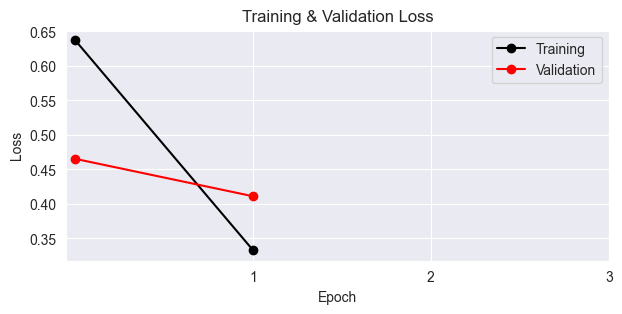

In [241]:
plt.rcParams["figure.figsize"] = (7,3)
plt.plot(perfdf['Training Loss'], 'k-o', label="Training")
plt.plot(perfdf['Valid. Loss'], 'r-o', label="Validation")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3])

plt.show()

# Kickstarter posts sentiment analysis

In [242]:
def get_pandas_frame(path):
    return pyreadr.read_r(path)[None]


def get_pandas_r_file(week_nr, file_type):
    week_nr = str(week_nr)
    week_folder = f"Kickstarter rds files/2019_week{week_nr}"
    pledge_name = os.path.join(week_folder, f"{file_type}.rds")
    return get_pandas_frame(pledge_name)


posts_week_19 = get_pandas_r_file(19, "posts")


posts_week_19["Post_Text"]

0         The Because Black Life Conference is a (Black)...
1         Hi everyone!  Hope your summer is going well! ...
2                                          ONLY FOR BACKERS
3                                          ONLY FOR BACKERS
4                                          ONLY FOR BACKERS
                                ...                        
446868    Just in case you never saw what the larger siz...
446869    The Altervice website is almost complete. I've...
446870    That's right folks! I'm currently working on a...
446871    Hey guys! Thanks so much for support! Here's a...
446872    With being a organic friendly company, with th...
Name: Post_Text, Length: 446873, dtype: object

In [243]:
data_posts = posts_week_19["Post_Text"]
#data_posts.rename(columns={'Post_Text': 'text'}, inplace=True)
data_posts = data_posts.dropna()
type(data_posts)

pandas.core.series.Series

In [244]:
data_posts.head()

0    The Because Black Life Conference is a (Black)...
1    Hi everyone!  Hope your summer is going well! ...
2                                     ONLY FOR BACKERS
3                                     ONLY FOR BACKERS
4                                     ONLY FOR BACKERS
Name: Post_Text, dtype: object

In [245]:
small_subset_posts = data_posts[:1000]
small_subset_posts

0      The Because Black Life Conference is a (Black)...
1      Hi everyone!  Hope your summer is going well! ...
2                                       ONLY FOR BACKERS
3                                       ONLY FOR BACKERS
4                                       ONLY FOR BACKERS
                             ...                        
995                                     ONLY FOR BACKERS
996                                                   KO
997                                     ONLY FOR BACKERS
998                                     ONLY FOR BACKERS
999                                     ONLY FOR BACKERS
Name: Post_Text, Length: 1000, dtype: object

In [246]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in small_subset_posts:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

# Set the batch size.
batch_size = 32

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables
predictions = []

# Predict
for batch in prediction_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)

    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask = batch

    # Telling the model not to compute or store gradients, saving memory and
    # speeding up prediction
    with torch.no_grad():
        # Forward pass, calculate logit predictions
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

    logits = outputs[0]

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()

    # Store predictions and true labels
    predictions.append(logits)

print('DONE.')


/Users/mehdigreefhorst/Desktop/Strategy and business models/venv/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Predicting labels for 1,000 test sentences...
DONE.


After this, you'll have the logits for each post in the predictions list. The logits are the model outputs before applying an activation function (like the softmax). To get the actual predictions, you can apply a softmax function and then take the argmax to get the most likely class:

In [247]:
from scipy.special import softmax

# Combine the results across the batches.
predictions = np.concatenate(predictions, axis=0)

# Apply the softmax function to get probabilities
probabilities = softmax(predictions, axis=1)

# Get the predictions
predicted_labels = np.argmax(probabilities, axis=1)

# Now `predicted_labels` will contain the predicted class (0, 1, or 2) for each post


In [248]:
merged_predicted_labels_dataset = pd.DataFrame({'Post_Text': small_subset_posts, 'Predicted_Label': predicted_labels})
merged_predicted_labels_dataset

,Post_Text,Predicted_Label
0,The Because Black Life Conference is a (Black)...,2
1,Hi everyone! Hope your summer is going well! ...,2
2,ONLY FOR BACKERS,2
3,ONLY FOR BACKERS,2
4,ONLY FOR BACKERS,2
...,...,...
995,ONLY FOR BACKERS,2
996,KO,2
997,ONLY FOR BACKERS,2
998,ONLY FOR BACKERS,2


In [249]:
final_merged_predicted_dataset = merged_predicted_labels_dataset.replace(0, "positive").replace(1, "negative").replace(
    2, "neutral")
final_merged_predicted_dataset


,Post_Text,Predicted_Label
0,The Because Black Life Conference is a (Black)...,neutral
1,Hi everyone! Hope your summer is going well! ...,neutral
2,ONLY FOR BACKERS,neutral
3,ONLY FOR BACKERS,neutral
4,ONLY FOR BACKERS,neutral
...,...,...
995,ONLY FOR BACKERS,neutral
996,KO,neutral
997,ONLY FOR BACKERS,neutral
998,ONLY FOR BACKERS,neutral


In [250]:
#show first row of final merged
print(final_merged_predicted_dataset['Post_Text'][0])
final_merged_predicted_dataset.iloc[0]


The Because Black Life Conference is a (Black)mosphere of Black Joy, Art, Education and Organizing.    We officially have 8 Endorsements!!! They include City Council member Andrea Jenkins, Black Lives Matter Minnesota, Voices For Racial Justice, Blackout Improv, The Black Visions Collective, NAACP MPls, Minnesota People Of Color Pride and The Midwest Mixed Conference!! And more are Coming in!!! Â 


Post_Text          The Because Black Life Conference is a (Black)...
Predicted_Label                                              neutral
Name: 0, dtype: object

/var/folders/f3/ykt1vfz96xz48try_trwdn440000gn/T/ipykernel_2067/1257198051.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=final_merged_predicted_dataset.Predicted_Label, palette='gray')


[Text(0.5, 1.0, 'Histogram News trained | Semantic Analysis'),
 Text(0, 0.5, 'Frequency number'),
 Text(0.5, 0, 'Sentiment')]

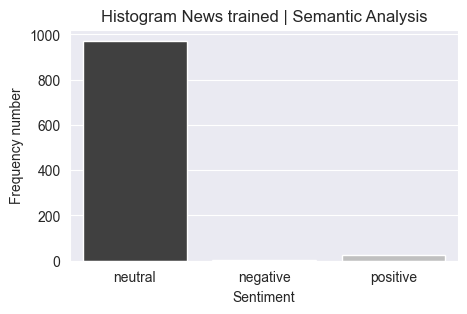

In [258]:
plt.figure(figsize=(5, 3))
sns.countplot(x=final_merged_predicted_dataset.Predicted_Label, palette='gray')
plt.gca().set(title='Histogram News trained | Semantic Analysis', ylabel='Frequency number', xlabel='Sentiment')


# Sentimaent analysis without any of the posts with larger token number than 500

In [259]:
data_posts = posts_week_19["Post_Text"][0:1000]
data_posts = data_posts.dropna()

data_posts_smaller_than_500 = []

In [260]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
max_len = 0
index = 0
for s in data_posts:
    input_ids = tokenizer.encode(s, add_special_tokens=True)
    # Update the maximum sentence length.

    if len(input_ids) < 500:
        data_posts_smaller_than_500.append(s)
    else:
        print(index)
    index = index + 1

print('max length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (522 > 512). Running this sequence through the model will result in indexing errors


33
78
90
140
162
164
165
167
197
198
204
206
207
208
209
210
211
212
255
256
283
284
286
289
290
291
292
293
295
297
298
315
324
327
335
336
338
354
355
364
365
388
405
406
407
409
410
411
413
416
418
444
445
448
496
499
502
503
504
506
509
513
514
569
578
600
643
663
693
719
720
742
743
746
747
752
754
755
759
760
766
784
792
864
876
max length:  0


In [261]:
data_posts_smaller_than_500

['The Because Black Life Conference is a (Black)mosphere of Black Joy, Art, Education and Organizing.    We officially have 8 Endorsements!!! They include City Council member Andrea Jenkins, Black Lives Matter Minnesota, Voices For Racial Justice, Blackout Improv, The Black Visions Collective, NAACP MPls, Minnesota People Of Color Pride and The Midwest Mixed Conference!! And more are Coming in!!! Â\xa0',
 "Hi everyone!  Hope your summer is going well! Here is just another update for Petography! The good news is the pet prints are coming along! The bad news is that as I'm finishing the last few weeks of the semester, school has been pretty heavy and I haven't had as much time as I'd like to work on the pictures.  So as soon as all of them are done, I will send out a PDF with your online version of your picture and will be sending out the prints ASAP!  Below is a sample of some of the pets done already.       Thanks again for your patience!  Cheers, Quinn",
 'ONLY FOR BACKERS',
 'ONLY FO

In [262]:
data_smaler_than_500_df = pd.DataFrame(data_posts_smaller_than_500)
data_smaler_than_500_df

,0
0,The Because Black Life Conference is a (Black)...
1,Hi everyone! Hope your summer is going well! ...
2,ONLY FOR BACKERS
3,ONLY FOR BACKERS
4,ONLY FOR BACKERS
...,...
910,ONLY FOR BACKERS
911,KO
912,ONLY FOR BACKERS
913,ONLY FOR BACKERS


In [273]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in data_posts_smaller_than_500:
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 512,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

# Set the batch size.
batch_size = 32

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables
predictions = []

# Predict
for batch in prediction_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)

    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask = batch

    # Telling the model not to compute or store gradients, saving memory and
    # speeding up prediction
    with torch.no_grad():
        # Forward pass, calculate logit predictions
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

    logits = outputs[0]

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()

    # Store predictions and true labels
    predictions.append(logits)

print('DONE.')


/Users/mehdigreefhorst/Desktop/Strategy and business models/venv/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Predicting labels for 915 test sentences...
DONE.


In [274]:
from scipy.special import softmax

# Combine the results across the batches.
predictions = np.concatenate(predictions, axis=0)

# Apply the softmax function to get probabilities
probabilities = softmax(predictions, axis=1)

# Get the predictions
predicted_labels = np.argmax(probabilities, axis=1)

# Now `predicted_labels` will contain the predicted class (0, 1, or 2) for each post


In [275]:
merged_predicted_labels_dataset = pd.DataFrame({'Post_Text': data_posts_smaller_than_500, 'Predicted_Label': predicted_labels})
merged_predicted_labels_dataset

,Post_Text,Predicted_Label
0,The Because Black Life Conference is a (Black)...,2
1,Hi everyone! Hope your summer is going well! ...,2
2,ONLY FOR BACKERS,2
3,ONLY FOR BACKERS,2
4,ONLY FOR BACKERS,2
...,...,...
910,ONLY FOR BACKERS,2
911,KO,2
912,ONLY FOR BACKERS,2
913,ONLY FOR BACKERS,2


In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(x=final_merged_predicted_dataset.Predicted_Label, palette='gray')
plt.gca().set(title='Histogram News trained | Semantic Analysis', ylabel='Frequency number', xlabel='Sentiment')
